In [2]:
#import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#load the dataset
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.isnull().sum()/len(df)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [5]:
#impute missing values
df['Age'].fillna(df['Age'].mean(), inplace=True)
#remove cabin column
df.drop('Cabin', axis=1, inplace=True)
#impute embarked with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

C:\Users\SAMRAN HUSSAIN\AppData\Local\Temp\ipykernel_5764\1193508575.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
C:\Users\SAMRAN HUSSAIN\AppData\Local\Temp\ipykernel_5764\1193508575.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

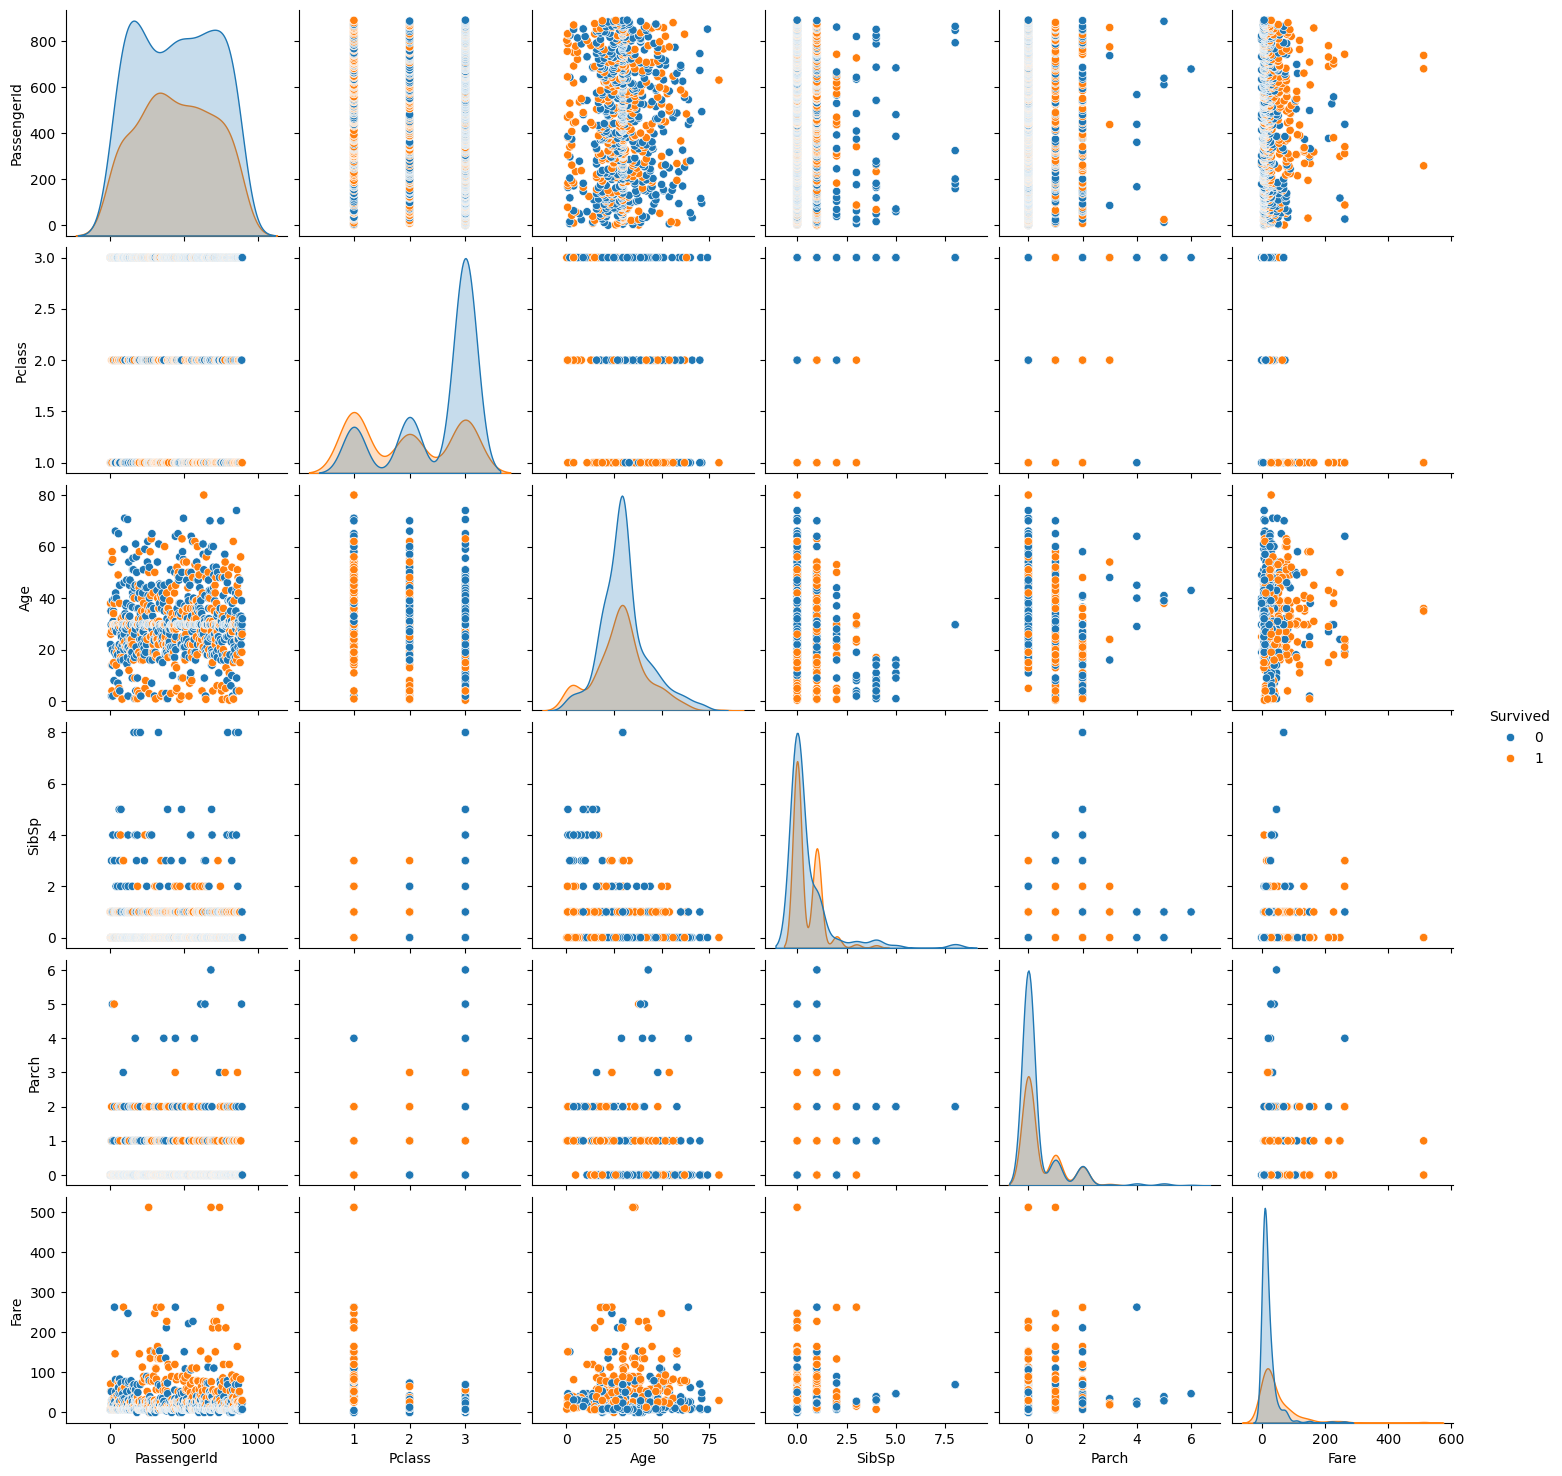

In [6]:
#visulize data 
sns.pairplot(df, hue='Survived')
plt.show()





In [7]:
# Data Cleaning
# Handle missing values:
# Impute Age using the mean/median or a predictive model.
# Drop Cabin (or use it to create a new feature like "Has Cabin").
# Fill missing Embarked values with the most frequent value (mode).
# Remove irrelevant columns (PassengerId, Name, Ticket might not be useful for prediction).
# Convert categorical variables (Sex, Embarked) to numerical using one-hot encoding or label encoding.
# Normalize numerical features using standardization or min-max scaling.
# Handle outliers using appropriate techniques (box plots, z-scores, etc.).
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset
df = pd.read_csv("titanic.csv")

# Handle missing values
df["Age"].fillna(df["Age"].mean(), inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)
# Drop Cabin column
df.drop("Cabin", axis=1, inplace=True)

# Convert categorical variables to numerical using one-hot encoding
# One-hot encoding is used for categorical variables with more than two categories.
# It creates new binary columns for each category.
df = pd.get_dummies(df, columns=["Sex", "Embarked"])
# Normalize numerical features using standardization
scaler = StandardScaler()
df["Age"] = scaler.fit_transform(df[["Age"]])
df["Fare"] = scaler.fit_transform(df[["Fare"]])

# Remove irrelevant columns
df.drop(["PassengerId", "Name", "Ticket"], axis=1, inplace=True)

# Split the data into features (X) and target (y)
X = df.drop("Survived", axis=1)
y = df["Survived"]
# Split the data into x and y  test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train a machine learning model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

#print  the accuracy
print(f"Model Accuracy: {accuracy:.2f}")






Model Accuracy: 0.81


C:\Users\SAMRAN HUSSAIN\AppData\Local\Temp\ipykernel_5764\4176670266.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].mean(), inplace=True)
C:\Users\SAMRAN HUSSAIN\AppData\Local\Temp\ipykernel_5764\4176670266.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset
df = pd.read_csv("titanic.csv")

# Handle missing values
df["Age"].fillna(df["Age"].mean(), inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)
# Drop Cabin column
df.drop("Cabin", axis=1, inplace=True)

# Convert categorical variables to numerical using one-hot encoding
df = pd.get_dummies(df, columns=["Sex", "Embarked"])

# Normalize numerical features using standardization
scaler = StandardScaler()
df["Age"] = scaler.fit_transform(df[["Age"]])
df["Fare"] = scaler.fit_transform(df[["Fare"]])

# Remove irrelevant columns
df.drop(["PassengerId", "Name", "Ticket"], axis=1, inplace=True)

# Split the data into features (X) and target (y)
X = df.drop("Survived", axis=1)
y = df["Survived"]

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a machine learning model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f"Model Accuracy: {accuracy:.2f}")


C:\Users\SAMRAN HUSSAIN\AppData\Local\Temp\ipykernel_13936\1588005493.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].mean(), inplace=True)
C:\Users\SAMRAN HUSSAIN\AppData\Local\Temp\ipykernel_13936\1588005493.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

Model Accuracy: 0.81


In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Display the first few rows
print(df.head())

# Basic information about the dataset
print(df.info())

# Summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [9]:
# Handle missing values
df['Age'].fillna(df['Age'].median(), inplace=True)  # Fill missing age with median
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)  # Fill missing Embarked with mode
df.drop('Cabin', axis=1, inplace=True)  # Drop Cabin column due to too many missing values

# Convert categorical variables to numerical
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Drop irrelevant columns
df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

# Display the cleaned dataset
print(df.head())

   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    0  22.0      1      0   7.2500         0
1         1       1    1  38.0      1      0  71.2833         1
2         1       3    1  26.0      0      0   7.9250         0
3         1       1    1  35.0      1      0  53.1000         0
4         0       3    0  35.0      0      0   8.0500         0


C:\Users\SAMRAN HUSSAIN\AppData\Local\Temp\ipykernel_5764\666153452.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)  # Fill missing age with median
C:\Users\SAMRAN HUSSAIN\AppData\Local\Temp\ipykernel_5764\666153452.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are s

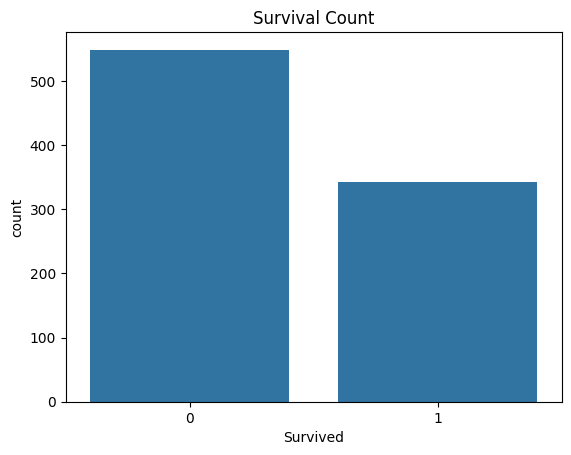

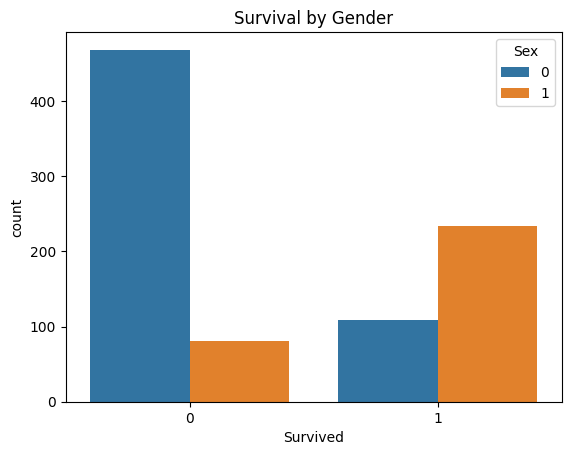

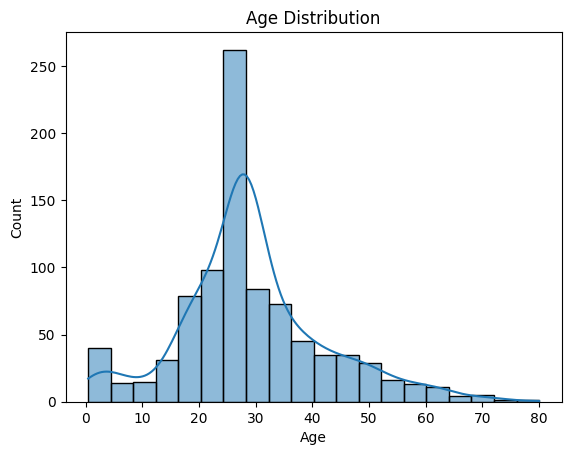

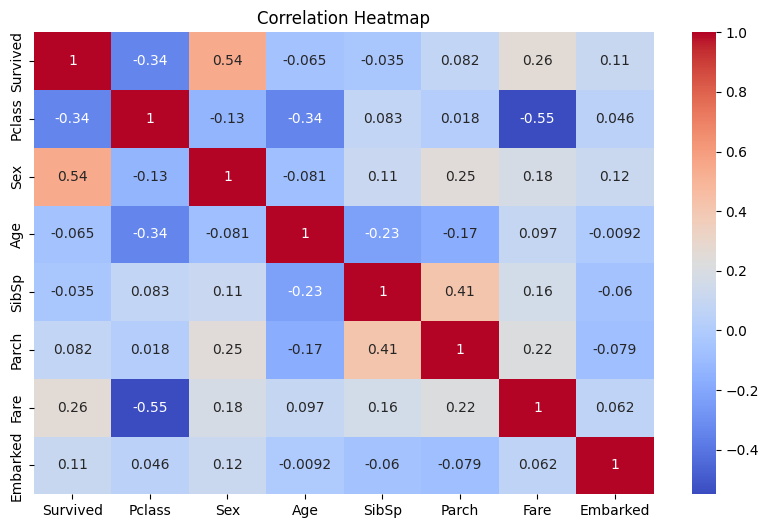

In [10]:
# Visualize survival count
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.show()

# Visualize survival by gender
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival by Gender')
plt.show()

# Visualize age distribution
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [11]:
# Define features and target
X = df.drop('Survived', axis=1)
y = df['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8268156424581006
Confusion Matrix:
 [[92 13]
 [18 56]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.81      0.76      0.78        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



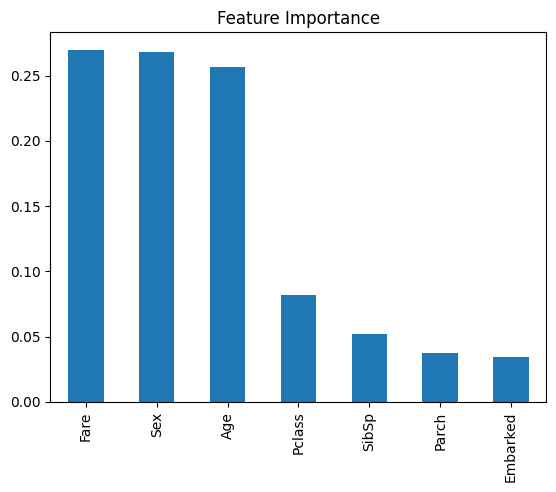

In [12]:
# Display feature importance
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importance')
plt.show()